In [190]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [191]:
# Reading Data from xlsx file require this package to be installed.
#!pip install openpyxl

In [192]:
train = pd.read_excel('Final_Train.xlsx')
test = pd.read_excel('Final_Test.xlsx')

#### created data frame from Train and Test data

In [193]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [194]:
pd.set_option('display.max_columns',None)

## Will work on Train dataset only and all action performed on train dataset will be applied on test data set in later steps.

In [195]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


## Observation:-
All data in tarin data set is object type(string data) except fee which is numeric.

In [196]:
# check for null values
round(train.isnull().sum())

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

## Observation:-
Rating and Miscellaneous info has mull values. we will check % of null value in dataset.

In [197]:
round(train.isnull().sum()/len(train) * 100,2)

Qualification          0.00
Experience             0.00
Rating                55.39
Place                  0.42
Profile                0.00
Miscellaneous_Info    43.95
Fees                   0.00
dtype: float64

### Observation:-
Ratting has 55% null values and Miscellaneous_Info has 44% null values of entire data, which is very huge.


All independent variable categorical by nature, we will clean one data from one column at a time.

# Data Cleaning

### Extract Experience Year from Experience column and convert to Numeric

In [198]:
# Experience contain string in value "24 years experience", We will extract this numerical part from given string.
train['Experience'] = train['Experience'].str.split().str[0]   #Extract experience numeric value from string given in experience variable.
train['Experience'] = train['Experience'].astype(int)

In [199]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


#### Now experiene has only numeric value in column.

### Moving with Place Column

##### * As, there are some missing values in Place column so I have replaced them with Unknown, 
##### * Unknown to represent them, we can easily extract city and locality from Place variable.

In [200]:
train.Place.fillna('Unknown,Unknown',inplace=True)

train['locality'] = train['Place'].str.split(",").str[0]
train['city'] = train['Place'].str.split(",").str[1]

#Now we can drop the place variable
train.drop('Place',axis=1,inplace=True)

### Rating Value

Rating has more then 50% of missing values so first we have to deal with them, then convert Rating to int.
for this we have replace ratting with imagnary value -99%, because imputing 50% of data with mode wil change the result.


In [201]:
# Fill missing values with -99% to provide them different importance.
train['Rating'].fillna('-99%',inplace=True)

# extract value of rating to avoid '%' and convert to numeric
train['Rating'] = train['Rating'].str.slice(stop=-1).astype(int)

#### Now, I grouped the rating in 10 groups(bins of size 10). Missing values will fall under 0 group. while, 0-9% will be class 1, 10–19% will be class 2, so on and so forth.we will use pd.cut() for this.**

Use cut when you need to segment and sort data values into bins. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

In [202]:
print("0-9% ",len(train[(train['Rating']>0) & (train['Rating']<10)]))
print("10-19% ",len(train[(train['Rating']>=10) & (train['Rating']<20)]))
print("20-29% ",len(train[(train['Rating']>=20) & (train['Rating']<30)]))
print("30-39% ",len(train[(train['Rating']>=30) & (train['Rating']<40)]))
print("And so-on..")

0-9%  1
10-19%  0
20-29%  0
30-39%  3
And so-on..


In [203]:
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
train['Rating'] = pd.cut(train['Rating'], bins=bins, labels=labels, include_lowest=True)

In [204]:
train['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

### Observation:-
1. All rating has been imputed with categorical values from 0 to 10.

## Qualification

Qualification has string type value , it has two part in a single value which is saperated by comma, i will divide them and take first part as this part shows the degree of individual dotor, it will also help us to group the different madical professionals like Ayurveda, Homeopethic or Allopathic

In [205]:
train['Qualification_count'] = train['Qualification'].apply(lambda x: len(x.split(",")))

train['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [206]:
train['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

##
##### here there are lot of Qualification but most of doctors only has 1 or 2 qualification.
##### And the data is to much messy like, 'MBA -Healthcare' and ‘MBA’ which referred to same category so here we will take the top 10 Qualification that occurs the most.

In [207]:
# Extract relevant qualification
# DICT of qualification with there counts
train["Qualification"]=train["Qualification"].str.split(",")
Qualification ={}
for x in train["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [208]:
#Extract top 10 qual
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [209]:
#Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    train[qual] = 0

for x,y in zip(train['Qualification'].values, np.array([i for i in range(len(train))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            train[c][y] = 1

In [210]:
# Now we can drop the extra quali which we added 
train.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [211]:
train.head(4)

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0


Now, we can see that we are having top 10 Qual columns in our training set which are perfectly one-hot encoded. where there is 2 Qual from top 10 in that row two 1 are there, and it's correct.

In [212]:
# CITY COLUMN
train['city'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Unknown',
       ' Sector 5', nan], dtype=object)

In [213]:
import re
train['city'] = train['city'].apply(lambda x: re.sub(' +','',str(x)))

In [214]:
train['city'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 25
Sector5                  1
nan                      1
Name: city, dtype: int64

In [215]:
# city contains some improper data.
train[(train['city'] == "nan") | (train['city'] == "Sector5")]

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
2169,11,0,Dentist,NaN,250,Dwarka,Sector5,0,1,0,0,0,0,0,0,0,0
3980,23,0,Dentist,NaN,250,e,nan,0,1,0,0,0,0,0,0,0,0


In [217]:
train['city'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 25
Sector5                  1
nan                      1
Name: city, dtype: int64

where ever the locality is Dwarka the city is Delhi, and this Sector5 is area of that so it's misclassified here. which we have to correct.
And where city nan there we have to impute this to unknown in locality and city both.

In [218]:
train['city'] = np.where(train['city']=="Sector5","Delhi", train['city'])

#nan
train['city'].loc[3980] = "Unknown"
train['locality'].loc[3980] = "Unknown"

In [219]:
train.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [220]:
# let's see for each city how much locality data is there
train.groupby('city')['locality'].nunique()

city
Bangalore             153
Chennai               124
Coimbatore             48
Delhi                 200
Ernakulam              52
Hyderabad             135
Mumbai                115
Thiruvananthapuram     48
Unknown                 1
Name: locality, dtype: int64

In [221]:
#Save cleaned data in csv
train.to_csv('data_correct.csv',index=False)

In [222]:
train.head(3)

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0


### Categorical Encoding
Before encoding a categorical variable, look at relationship of data with respect to target column To have better understand the data.

## EDA

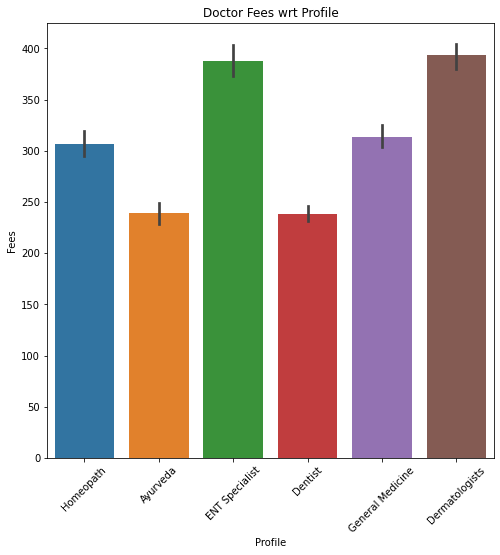

In [102]:
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=train)
plt.title("Doctor Fees wrt Profile")
plt.xticks(rotation=45)
plt.show()

## Observation:-
1. We can see in this graph that Dematologiest and ENT Specialist has highest fee.

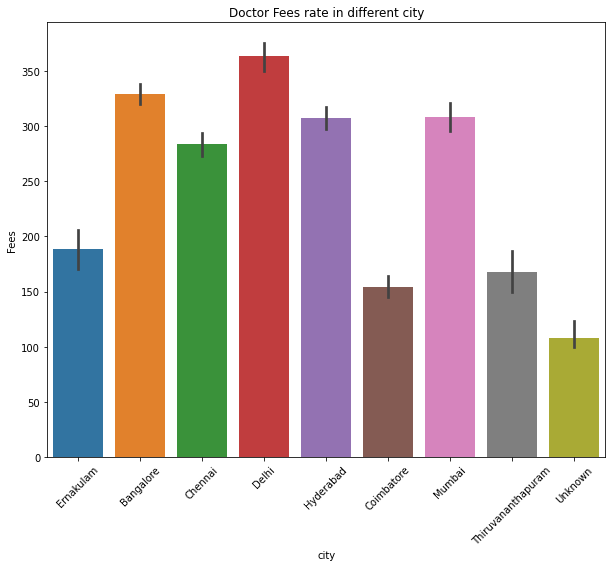

In [103]:
plt.figure(figsize=(10,8))
sns.barplot(x='city',y='Fees',data=train)
plt.title("Doctor Fees rate in different city")
plt.xticks(rotation=45)
plt.show()

As Delhi, Banglore, Hyderabad, Mumbai and Chennai are in list of Tier 1 city so, as usual the doctor consultation fees in these metripolean cities are very high as compared to Tier 2 and Tier 3 city.

Doctor Fess with having profile as ENT Specialist and Dermatologist is very high then Homeopath and Genral medicine are at same level.

### Impute profile and city data with numerical values using dammies.

In [104]:
train = pd.get_dummies(train,columns=['city','Profile'], prefix=['city','Profile'])

In [105]:
train.head()

,Experience,Rating,Miscellaneous_Info,Fees,locality,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,city_Bangalore,city_Chennai,city_Coimbatore,city_Delhi,city_Ernakulam,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,12,10,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,9,0,NaN,300,Mathikere - BEL,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,20,10,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


### Miscellaneous_Info & locality

Miscellaneous_Info is to much messy column and it consist the data which we already have like doctor address(city & locality) and Rating
locality and city are approximate have same relationship so better to move with only city
so drop the Miscellaneous_Info and locality

In [106]:
train.drop(['Miscellaneous_Info','locality'],axis=1,inplace=True)

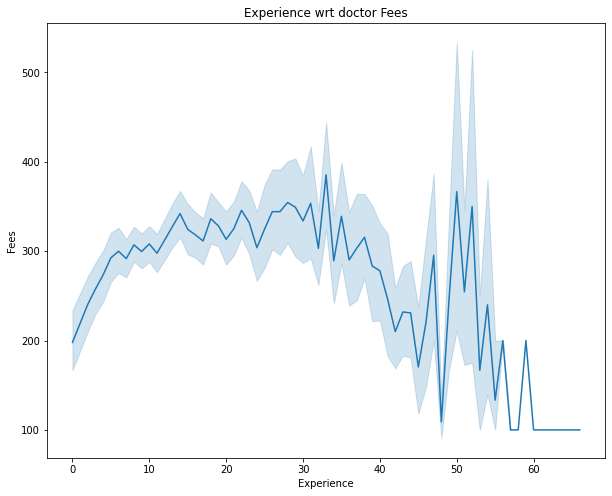

In [107]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Experience',y='Fees',data=train)
ax.set_title("Experience wrt doctor Fees")
plt.show()

## Observation:-

Hgher the experience is not always refer to higher the consulation fee, most of the time 30 to 40 year of experience having high fees, after this is going down.

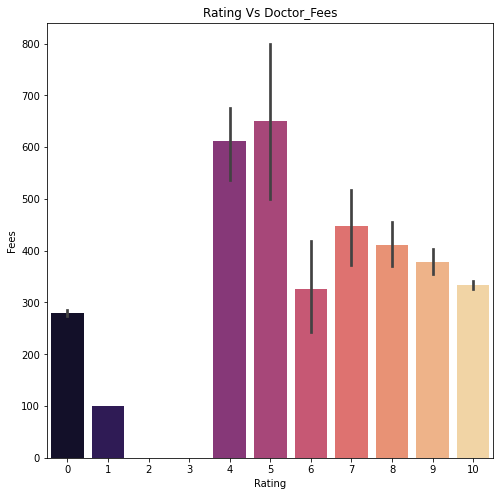

In [108]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Fees',data=train,palette='magma')
plt.title("Rating Vs Doctor_Fees")
plt.show()

## Observation:-


Rating is interesting column, we have grouped the rating in 10 bins, eg: bin5 will be rating of 40-49%.

As, we can see that High rating does not relate to high fees charged(infact low fees can be reason of high rating) and where fees are charged so high, there rating is between 30-60%.

The median of experience in bin 4 & 5 is 27 and 31 years respectively. whereas in highest rating of 10th bin the median experience is 14 years

In [110]:
train.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,city_Bangalore,city_Chennai,city_Coimbatore,city_Delhi,city_Ernakulam,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,100,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,12,10,350,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,9,0,300,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12,0,250,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,20,10,250,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


#### TEST DATASET
Applying all the abovce changes in test dataset.

In [111]:
# EXPERIENCE COLUMN
test['Experience'] = test['Experience'].str.split().str[0]
test['Experience'] = test['Experience'].astype(int)

#Place column (Extract city and locality in diff column)
test['Place'].fillna('Unknown,Unknown',inplace=True)
test['locality'] = test['Place'].str.split(",").str[0]
test['city'] = test['Place'].str.split(",").str[1]
#drop place column
test.drop('Place',axis=1,inplace=True)

#Rating column
test['Rating'].fillna('-99%',inplace=True)
test['Rating'] = test['Rating'].str.slice(stop=-1).astype(int)
# group rating in 10 groups, missing_value to group 0
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [int(i) for i in range(11)]
test['Rating'] = pd.cut(test['Rating'], bins=bins, labels=labels, include_lowest=True)

In [112]:
# QUALIFICATION COLUMN
# dict of qualification with counts
# HERE the top 10 Qual of train and test col should be same so I am imputing the train col to test col
data = pd.read_excel('Final_Train.xlsx')
data['Qualification'] = data['Qualification'].str.split(",")
Qualification = {}
for x in data['Qualification']:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each] += 1
        else:
            Qualification[each] = 1
            
# finding out the top 10 Qualification
most_qual = sorted(Qualification.items(), key=lambda x:x[1], reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])

#encode the top 10 qualification in test dataset
for title in final_qual:
    test[title] = 0

for x,y in zip(test['Qualification'].values, np.array([i for i in range(len(test))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            test[c][y] = 1
            
#drop Qualification after getting top 10 qual.
test.drop('Qualification',axis=1,inplace=True)


#city column
test['city'] = test['city'].apply(lambda x: re.sub(' +','',x))

#encode city and profile
test = pd.get_dummies(test, columns=['city','Profile'], prefix=['city','Profile'])

#drop Miscellaneous_Info and locality
test.drop(['Miscellaneous_Info','locality'], axis=1, inplace=True)

In [113]:
test.head()

,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,city_Bangalore,city_Chennai,city_Coimbatore,city_Delhi,city_Ernakulam,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,40,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,16,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


##  Split Data in x and y

In [114]:
x = train.drop('Fees',axis=1)
y = train['Fees']

Feature Scalling

StandardScaler xbar = x - mean(x) / std(x)

In [115]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x = stdsc.fit_transform(x)

In [116]:
# train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Model Building

In [117]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge

# to use RMSLE we will create our own scorer
from sklearn.metrics import make_scorer

In [118]:
# calculate RMSLE.
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    # 1-RMSLE

# make our own scorer
scorer = make_scorer(score,greater_is_better=True, needs_proba=False)

In [136]:
knn_reg = KNeighborsRegressor()
svm_reg = SVR(gamma='scale')
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
rd = Ridge()
ls = Lasso()

In [137]:
# Training and testing
for reg in (knn_reg, svm_reg, dt_reg, rf_reg,rd,ls):
    reg.fit(x_train, y_train)
    
    y_pred = reg.predict(x_test)
    
    print(reg, score(y_pred,y_test))

KNeighborsRegressor() 0.7755569355828301
SVR() 0.7942077126478044
DecisionTreeRegressor() 0.6701626271360062
RandomForestRegressor() 0.7651919662330846
Ridge() 0.7895504899133253
Lasso() 0.789143689137196


### Cross Validation

In [142]:
from sklearn.model_selection import cross_val_score
for reg in (knn_reg, svm_reg, dt_reg, rf_reg,rd,ls):
    scores = cross_val_score(reg, x, y, cv=5, scoring=scorer)
    print("Score of {} is {}".format(reg, scores.mean()))

Score of KNeighborsRegressor() is 0.7686417391734433
Score of SVR() is 0.7944627988621985
Score of DecisionTreeRegressor() is 0.6877539291619066
Score of RandomForestRegressor() is 0.7646366337822404
Score of Ridge() is 0.7883347655048475
Score of Lasso() is 0.7882776829443433


### Minimum difference in cross val and Score is coming for SVR and Lasso Regression model.
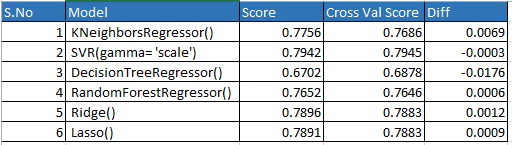

### HyperParameter Tuning SVR Model

In [121]:
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV

In [122]:
grid = dict(C=[0.1,1,10], kernel=['linear','poly','rbf'], gamma=['scale','auto'])
gridsearch = GridSearchCV(svm_reg, param_grid=grid, cv=5, scoring=scorer, verbose=1, n_jobs=-1)
gridsearch.fit(x_train,y_train)
print("best_score:",gridsearch.best_score_)
print("best_params:\n",gridsearch.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
best_score: 0.8056521524720275
best_params:
 {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [123]:
# predict the test data from it and see the result

predictions = gridsearch.predict(x_test)

print("1-RMSLE:",score(predictions, y_test))

1-RMSLE: 0.804639194678942


### Hyper parameter tuning improved result .

# Saving Model with Best paramters.

In [143]:
import joblib 
svm = SVR(C=10,gamma='auto',kernel='rbf')
svm.fit(x_train, y_train)
joblib.dump(svm,'Doctor_fee_predict.pki')

['Doctor_fee_predict.pki']

In [144]:
model = joblib.load('Doctor_fee_predict.pki')    #load model to predict test data.

In [145]:
prediction = model.predict(test)

In [146]:
ds_pred = pd.DataFrame(prediction)  # Save predicted value in dataframe

In [147]:
ds_pred

,0
0,228.819256
1,228.819256
2,228.819256
3,354.516211
4,228.817959
...,...
1982,216.578055
1983,249.615713
1984,206.880319
1985,228.848144


### Values coming in fload and not in multiplier of 50, we have to round off this value to get correct fees of a doctors.

In [148]:
def rounding(x):
  m=(x//50)*50
  if m==x:
    return int(x/1.0)
  elif x-m>=25.0:
    return int((m+50)/1.0)
  else:
    return int(m/1.0)

In [153]:
predicted_fee=[]
for i in range(len(prediction)):
predicted_fee.append(rounding(prediction[i]))
predicted_fee=pd.DataFrame({'id':np.arange(1,len(predicted_fee)+1,1),'Fees':predicted_fee})
print(predicted_fee.head())

   id  Fees
0   1   250
1   2   250
2   3   250
3   4   350
4   5   250


In [154]:
predicted_fee

,id,Fees
0,1,250
1,2,250
2,3,250
3,4,350
4,5,250
...,...,...
1982,1983,200
1983,1984,250
1984,1985,200
1985,1986,250


In [156]:
predicted_fee.to_csv('doctors_predicted_fee.csv')

### Now We have all the values in multiplier of 50, we have save this prediction in CSV.